In [112]:
%load_ext autoreload
%autoreload 2
from kmodes.tests.test_kprototypes_missing import read_test_data
import pandas as pd 
from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   index         x         y   color    value
0      0  2.583515  8.033581     red  value_5
1      1  1.817624  5.201747    blue  value_7
2      2 -0.855424  3.128247  purple  value_4
index      int64
x        float64
y        float64
color     object
value     object
dtype: object
[['red' 'value_9']
 ['red' 'value_4']
 ['red' 'value_5']
 ['red' nan]
 ['black' 'value_10']
 ['red' 'value_3']
 ['purple' 'value_7']
 ['red' 'value_9']
 ['red' 'value_7']
 ['black' 'value_8']
 ['black' 'value_4']
 ['black' 'value_7']
 ['red' 'value_7']
 ['red' 'value_6']
 ['red' 'value_8']
 ['red' nan]
 ['red' 'value_9']
 ['red' 'value_7']
 ['red' 'value_6']
 ['red' 'value_6']]
[[ 3 14]
 [ 3  9]
 [ 3 10]
 [ 3 -1]
 [ 0  2]
 [ 3  8]
 [ 2 12]
 [ 3 14]
 [ 3 12]
 [ 0 13]
 [ 0  9]
 [ 0 12]
 [ 3 12]
 [ 3 11]
 [ 3 13]
 [ 3 -1]
 [ 3 14]
 [ 3 12]
 [ 3 11]
 [ 3 11]]
[{'black': 0, 'blue': 1, 'purple': 2, 'red': 3}, {'value_0': 0, 'value_1': 1, 'value_10': 2, 'value_11': 3, 'value_12': 4, 'value_13': 5, 'value_14': 6, 'v

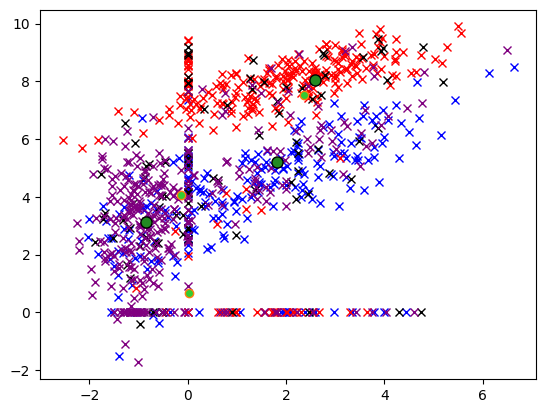

In [113]:
p=50
X = pd.DataFrame(read_test_data(0.9))
X[0] = X[0].map(lambda v: 0 if np.isnan(v) else v)
X[1] = X[1].map(lambda v: 0 if np.isnan(v) else v)
X[2] = X[2].map(lambda v: 'black' if pd.isnull(v) else v)
#X.head()
Xblue = X.loc[X[2] == 'blue']
Xblack = X.loc[X[2] == 'black']
Xpurple = X.loc[X[2] == 'purple']
Xred = X.loc[X[2] == 'red']
plt.plot(Xblue[0], Xblue[1], 'x', color='blue')
plt.plot(Xred[0], Xred[1], 'x', color='red')
plt.plot(Xblack[0], Xblack[1], 'x', color='black')
plt.plot(Xpurple[0], Xpurple[1], 'x', color='purple')
expected_centroids = pd.read_csv('kmodes/tests/data/expected_test_kprototype_single.csv',sep=';')
print(expected_centroids)
print(expected_centroids.dtypes)
#   index         x         y   color    value
#0      0  2.583515  8.033581     red  value_5
#1      1  1.817624  5.201747    blue  value_7
#2      2 -0.855424  3.128247  purple  value_4
plt.plot(expected_centroids['x'], expected_centroids['y'], 'o',ms=8,mec='black',mfc='forestgreen')
kprot = KPrototypes(n_clusters=3, n_init=50, max_iter=1000, n_jobs=1)
kprot_fit = kprot.fit(X, categorical=categorical, missing_obs=True)
centroids_10pc_miss = pd.DataFrame(kprot_fit.cluster_centroids_, 
                                   columns = ['x','y','color','value'])
centroids_10pc_miss['x'] = pd.to_numeric(centroids_10pc_miss['x'])
centroids_10pc_miss['y'] = pd.to_numeric(centroids_10pc_miss['y'])
print(centroids_10pc_miss)
print(centroids_10pc_miss.dtypes)
plt.plot(centroids_10pc_miss['x'], centroids_10pc_miss['y'], 'o',ms=6,mfc='limegreen')
